<a href="https://colab.research.google.com/github/umarpir/HousePricePredictor/blob/main/House_price_valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import  train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from google.colab import files
upload = files.upload()
from pandas.core.common import random_state
from math import sqrt

Saving BostonHousing.csv to BostonHousing.csv


importing the uk house price data set

In [2]:
house_price_dataset = pd.read_csv('BostonHousing.csv')


In [3]:
house_price_dataframe = pd.DataFrame(house_price_dataset)

In [4]:
house_price_dataframe.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# check the sumber of rows and columns
house_price_dataframe.shape

(506, 14)

In [6]:
# check for missing values
house_price_dataframe.isnull().sum() 

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
#drop columns that have any missing values
house_price_dataframe = house_price_dataframe.dropna(how='any')

In [7]:
# check again for missing values
house_price_dataframe.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [9]:
# check the number of rows and columns again
house_price_dataframe.shape

(506, 14)

In [10]:
house_price_dataframe.describe(include = 'all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


understanding the correlation in the data

In [11]:
#house_price_dataframe['Post code']=house_price_dataframe['Post code'].astype('category').cat.codes
#house_price_dataframe['House Type']=house_price_dataframe['House Type'].astype('category').cat.codes
#house_price_dataframe['New Build']=house_price_dataframe['New Build'].astype('category').cat.codes
#house_price_dataframe['Estate Type']=house_price_dataframe['Estate Type'].astype('category').cat.codes
#house_price_dataframe['Town/City']=house_price_dataframe['Town/City'].astype('category').cat.codes
#house_price_dataframe['District']=house_price_dataframe['District'].astype('category').cat.codes
#house_price_dataframe['County']=house_price_dataframe['County'].astype('category').cat.codes
correlation = house_price_dataframe.corr()

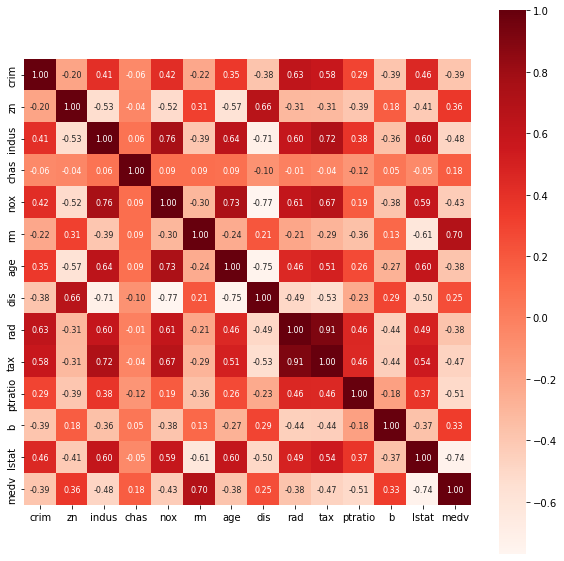

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True,fmt = '.2f',annot=True, annot_kws={'size':8}, cmap='Reds')

In [13]:

X = house_price_dataframe.drop(['medv'], axis=1)
Y = house_price_dataframe['medv']

In [14]:
print(X)
print(Y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [17]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size= 0.2,random_state= 45)

In [18]:
print(X.shape,X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [19]:
print(X_train.dtypes)
print(Y_train.dtypes)


crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
dtype: object
float64


model traing using XGboost regression model

In [20]:
#load the model
model = XGBRegressor()

In [21]:
#TRAIN THE MODEL WITH x TRAIN
model.fit(X_train, Y_train)

[23:21:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [22]:
# accuracy
training_data_prediction = model.predict(X_train)

In [37]:
print(training_data_prediction)

[33.844936  33.338547  14.192688  25.39797   21.144526  17.371643
 19.302675  19.862589  17.880318  15.93515   30.843063  24.019337
 22.035175  35.4158    21.165442  21.306572  19.358383  14.752025
 20.958435  21.387016  15.593195  18.62453   20.419924  48.39163
 11.412365  29.013645  33.376305  32.496452   8.867378  16.71006
 14.975734  21.21108   12.678712  23.221552  26.489206  20.691715
 20.81675   22.922472  19.239803  19.75465   30.85235   21.763985
 21.208862  20.78081   24.490438  22.562517  21.333147  14.42139
 24.295992  49.122234  36.606823  20.419924  19.613695  18.718376
 20.906494  21.039648  22.282621  34.004704  24.035337  16.408005
 15.447626  16.85596   11.979503  10.742641  23.197403  21.308931
 17.35852   23.479416  25.982431  21.520163  22.847113  21.501326
 19.908466  24.611704  30.774368  27.435547  13.259264  12.748516
 33.943825  16.091133  14.544074   9.154032  14.456561  27.053112
 21.928648  36.559025  26.628584  19.883413  38.78917   13.694842
 49.067036  1

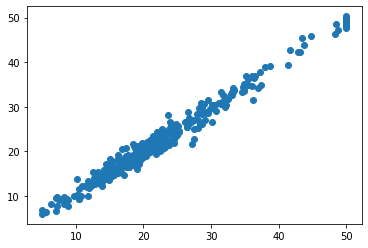

In [23]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")

In [38]:
#RMSE
score1 = sqrt(metrics.mean_squared_error(Y_train,training_data_prediction))

#mean Absolute error
score2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

print("RMSE : " , score1)
print("MAE : " , score2)


RMSE :  1.313282902505429
MAE :  1.0119247894488412


In [ ]:
testdata_prediction = model.predict(X_test)


In [ ]:
plt.scatter(Y_test,testdata_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")

In [ ]:
#RMSE
score1 = sqrt(metrics.mean_squared_error(Y_test,testdata_prediction))

#mean Absolute error
score2 = metrics.mean_absolute_error(Y_test,testdata_prediction)

print("RMSE : " , score1)
print("MAE : " , score2)